In [129]:
#pip install gym
#pip install gym[classic_control]

In [2]:

import gym
import time
from random import randint
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys
  
  
from collections import defaultdict
import workingPlotting 
  
matplotlib.style.use('ggplot')

# Cargo el entorno

In [3]:
env = gym.make('CartPole-v1')

# Simulación

In [4]:

for _ in range(10):
    obs = env.reset()
    done = False
    while not done:
        policy = randint(0,1)
        obs, reward, done, info = env.step(policy)
        print(obs)
        env.render()
        time.sleep(0.05)
        if done:
            env.reset()
env.close()

[-0.02120662 -0.22863148 -0.01446962  0.2943985 ]
[-0.02577925 -0.03330625 -0.00858165 -0.0028126 ]
[-0.02644538 -0.22830409 -0.00863791  0.2871504 ]
[-0.03101146 -0.4233018  -0.0028949   0.5770965 ]
[-0.0394775  -0.61838305  0.00864703  0.8688661 ]
[-0.05184516 -0.8136216   0.02602436  1.1642551 ]
[-0.06811759 -0.6188479   0.04930946  0.8798439 ]
[-0.08049455 -0.42442933  0.06690633  0.60306156]
[-0.08898313 -0.6204201   0.07896756  0.9160458 ]
[-0.10139154 -0.42644972  0.09728848  0.64918923]
[-0.10992053 -0.232808    0.11027227  0.3886579 ]
[-0.11457669 -0.42930827  0.11804543  0.71397245]
[-0.12316286 -0.6258494   0.13232487  1.0413573 ]
[-0.13567984 -0.43270957  0.15315202  0.7929703 ]
[-0.14433403 -0.62956494  0.16901143  1.129648  ]
[-0.15692534 -0.4370102   0.19160439  0.89438444]
[-0.16566554 -0.63414156  0.20949207  1.2406578 ]
[-0.04076287 -0.20817536  0.01275509  0.25378993]
[-0.04492638 -0.40347707  0.01783089  0.55046856]
[-0.05299592 -0.20861006  0.02884026  0.26345652]


In [5]:

def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    def policyFunction(state):
   
        Action_probabilities = np.ones(num_actions,
                dtype = float) * epsilon / num_actions
        
        
        state_tup = state[0],state[1],state[2],state[3]

        best_action = np.argmax(Q[state_tup])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities
   
    return policyFunction

In [8]:
def qLearning(env, num_episodes, discount_factor = 1.0,
							alpha = 0.6, epsilon = 0.1):
	
	# Action value function
	# A nested dictionary that maps
	# state -> (action -> action-value).
	Q = defaultdict(lambda: np.zeros(env.action_space.n))

	# Keeps track of useful statistics
	stats = workingPlotting.EpisodeStats(
		episode_lengths = np.zeros(num_episodes),
		episode_rewards = np.zeros(num_episodes))	
	
	# Create an epsilon greedy policy function
	# appropriately for environment action space
	policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)
	
	# For every episode
	for ith_episode in range(num_episodes):
		
		# Reset the environment and pick the first action
		state = env.reset()
		
		for t in itertools.count():
			
			# get probabilities of all actions from current state
			action_probabilities = policy(state)

			# choose action according to
			# the probability distribution
			action = np.random.choice(np.arange(
					len(action_probabilities)),
					p = action_probabilities)

			# take action and get reward, transit to next state
			next_state, reward, done, _ = env.step(action)

			# Update statistics
			stats.episode_rewards[ith_episode] += reward
			stats.episode_lengths[ith_episode] = t
			
			# TD Update
			state_tup = next_state[0], next_state[1], next_state[2], next_state[3]
			
			best_next_action = np.argmax(Q[state_tup])	
			td_target = reward + discount_factor * Q[state_tup][best_next_action]
			td_delta = td_target - Q[state_tup][action]
			Q[state_tup][action] += alpha * td_delta

			# done is True if episode terminated
			if done:
				break
				
			state = state_tup
	
	return Q, stats


In [9]:
Q, stats = qLearning(env, 1000)

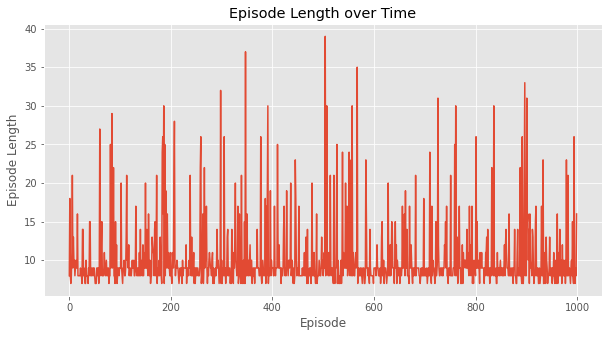

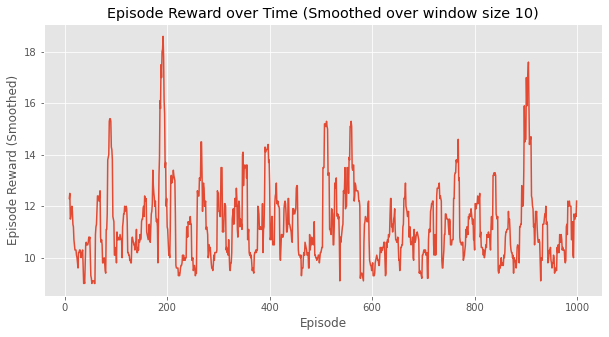

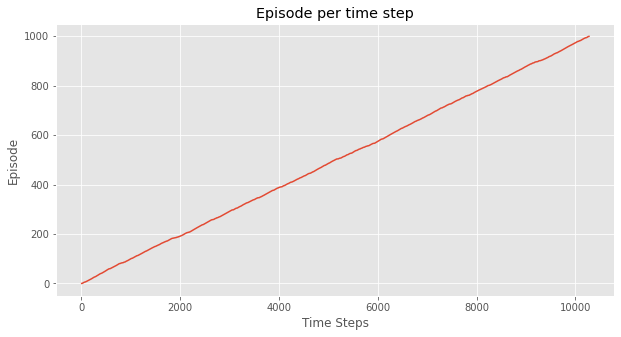

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [10]:
workingPlotting.plot_episode_stats(stats)

In [137]:
disc_space = np.linspace(0,1,6)
disc_space

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [138]:
x = 0.3
disc_x = disc_space[np.digitize(x, disc_space)]
disc_x

0.4

# 2048

Algunas observaciones que encontramos despues dejugar multiples veces:
- Mantener la ficha con el valor más alto en una de las esquinas facilita poder continuar con el juego de forma optima

Minimax:

In [ ]:
pseudocodigo (no correr celda):

funcion minimax(nodo, altura, turno){
    si altura = 0 o es nodo final{
        devolver la heuristica del valor del nodo
    }
    si es turno del jugador 1 {
        mejor valor = -infinito
        para cada nodo n{
            valor = minimax(n, altura-1, jugador 2)
            mejor valor = maximo entre mejor valor y valor
        }
        devolver mejor valor
    }
    si no{
        mejor valor = +infinito
        para cada nodo n{
            valor = minimax(n, altura-1, jugador 1)
            mejor valor = minimo entre mejor valor y valor
        }
        devolver mejor valor
    }
}

In [ ]:
(* Initial call *)
minimax(root, depth, player1)

In [1]:
import Grid

In [2]:
def terminal(node):
	return not node.canMove()

In [3]:
def Eval(node):
	import math 
	import numpy as np

	if terminal(node):
		return -np.inf

	gradients = [
				[[ 3,  2,  1,  0],[ 2,  1,  0, -1],[ 1,  0, -1, -2],[ 0, -1, -2, -3]],
				[[ 0,  1,  2,  3],[-1,  0,  1,  2],[-2, -1,  0,  1],[-3, -2, -1, -0]], 
				[[ 0, -1, -2, -3],[ 1,  0, -1, -2],[ 2,  1,  0, -1],[ 3,  2,  1,  0]], 
				[[-3, -2, -1,  0],[-2, -1,  0,  1],[-1,  0,  1,  2],[ 0,  1,  2,  3]]
				]

	values = [0,0,0,0]

	for i in range(4):
		for x in range(4):
			for y in range(4):
				values[i] += gradients[i][x][y]*node.map[x][y]

	
	return max(values)

In [ ]:
def getChild(grid, dir):
	temp = grid.clone()
	temp.move(dir)
	return temp

In [ ]:
class PlayerAI:
	def getMove(self, grid):
		moves = grid.getAvailableMoves()
		maxUtility = -np.inf
		nextDir = -1

		for move in moves:
			child = getChild(grid, move)

			utility = minimax(grid=child, max=False) 

			if utility >= maxUtility:
				maxUtility = utility
				nextDir = move

		return nextDir


In [ ]:
def minimax(node, depth, turn):
	if terminal(node) or depth == 0:
		return Eval(node)
	if turn == player1:
		bestValue =  -np.inf
		for child in node:
			val = minimax(child, depth-1, player2)
			bestValue = max(bestValue, val)
		return bestValue

	else:
		bestValue = np.inf 
		empty = node.getAvailableCells();
		children = []

		for pos in empty:
			current_grid2 = node.clone()
			current_grid4 = node.clone()

			current_grid2.insertTile(pos, 2)
			current_grid4.insertTile(pos, 4)

			children.append(current_grid2)
			children.append(current_grid4)
 
		for child in children:
			bestValue = min(bestValue, minimax(child, depth-1, player1))
		return bestValue
		